# SVM with sklearn exercise on toy datasets

Below you find several "toy datasets" generated with sklearn.
For each of them try to perform classification using SVM. Each time visualize decision boundary.
Experiment with type of SVM(linear, kernelized) and hyperparameters.
Try to underfit and overfit the model to datasets on purpose by changing the parameters. 
Add your comments and observations.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt, matplotlib as mpl

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# matplotlib plots style
COLOR = 'yellow'
mpl.rcParams['text.color'] = mpl.rcParams['axes.labelcolor'] = mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = COLOR
cmap_bold = ListedColormap([ '#00FF00', '#0000FF','#000000', '#FFFF00'])

---
## Steps

The steps we must undertake:
* getting data
* splitting data
* generating model
* evaluating model
* plotting data & model boundary

---
## My functions

Function for evaluating the classifier.

In [56]:
def model_evaluation(X_test, y_test, clf):
    """
    Prints the target/class of the test dataset (y_test) and the predictions based on the classifier.
    And prints the accuracy score of the predictions.
    """
    y_pred = clf.predict(X_test)
    print("Prediction target:\t", y_pred)
    print("Test target:\t\t", y_test)
    print("Accuracy:\t\t", metrics.accuracy_score(y_test, y_pred)*100, "%")

Function for plotting the dataset & the boundaries.

In [57]:
def plot_boundaries(X, Y, clf, range, ax):
    """
    Plot on the ax the datapoints and boundaries based on the classifier (clf).
    """
    xx, yy = np.meshgrid(
    np.arange(*range),
    np.arange(*range))
    Z  = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.sca(ax)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Dark2_r, alpha=0.2)
    plt.scatter(x=X[:, 0], y=X[:, 1], marker='o', c=Y, edgecolor='k')

Function designed to visualize decision boundary. (ref code)

In [64]:

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2) # boundary
    plt.plot(x0, gutter_up, "k--", linewidth=2)        # upper support vector 
    plt.plot(x0, gutter_down, "k--", linewidth=2)      # lower support vector

---
## Task 1

In [55]:
# getting data
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, n_classes=2, 
                             random_state=1)                           
# splitting data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2,random_state=54)

# generating model
clf1 = SVC(kernel="linear", C=float("inf"))
clf1.fit(X1_train, y1_train)

# evaluating model
model_evaluation(X1_test, y1_test, clf1)

Prediction target:	 [1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0]
Test target:		 [1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0]
Accuracy:		 100.0 %


We get an accuracy of 100%, this is an excellent accuracy. <br>
The linear vector support machine is a good choice for this type of dataset. <br>
The dataset is linearly separable.

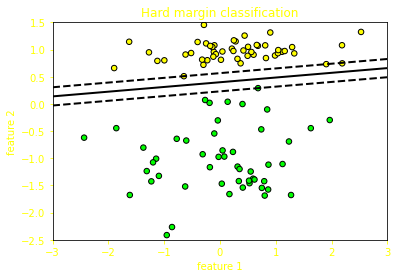

In [78]:
# plotting data & model boundary
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=30, edgecolor='k', cmap=cmap_bold) # our data
plot_svc_decision_boundary(clf1, -3, 3)                                                # our boundary

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.axis([-3, 3, -2.5, 1.5])
plt.title("Hard margin classification")
plt.show()

Observing the plot we clearly see where the boundary & support vectors lay. <br>
This type of classification seems good for this model because there are no outliers and the data is clearly linearly separable.

---
## Task 2

In [79]:
# getting data
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state=1)
                            
# splitting data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2,random_state=54)

# generating model
clf2 = SVC(kernel="linear", C=float("inf"))
clf2.fit(X2_train, y2_train)

# evaluating model
model_evaluation(X2_test, y2_test, clf2)

Prediction target:	 [0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0]
Test target:		 [0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0]
Accuracy:		 100.0 %


This dataset is also a good candidate for linear classification.

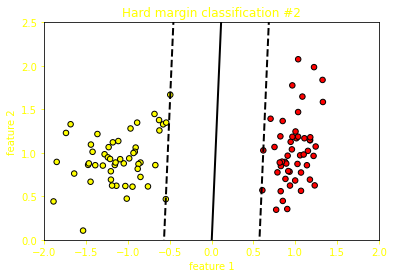

In [83]:
# plotting data & model boundary
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=30, edgecolor='k', cmap='autumn') # our data
plot_svc_decision_boundary(clf2, -2, 2)                                               # our boundary
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.axis([-2, 2, 0, 2.5])
plt.title("Hard margin classification #2")
plt.show()

We observe a clear boundary with a large margin between the two clusters.

---
## Task 3

In [84]:
# getting data
X3, Y3 = make_classification(n_samples=100,n_features=3, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, random_state=42)
                            
# splitting data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2,random_state=54)

# generating model
clf3 = SVC(kernel="linear", C=float("inf"))
clf3.fit(X3_train, y3_train)

# evaluating model
y3_pred = clf3.predict(X3_test)
print("Prediction target:\t", y3_pred)
print("Test target:\t\t", y3_test)
print("Accuracy:\t\t", metrics.accuracy_score(y3_test, y3_pred)*100, "%")

Prediction target:	 [0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1]
Test target:		 [0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1]
Accuracy:		 90.0 %


The accuracy of the classification is 90%, this is still a good classification (linear) method. <br>
Further we will try to improve the score with the help of soft margin.

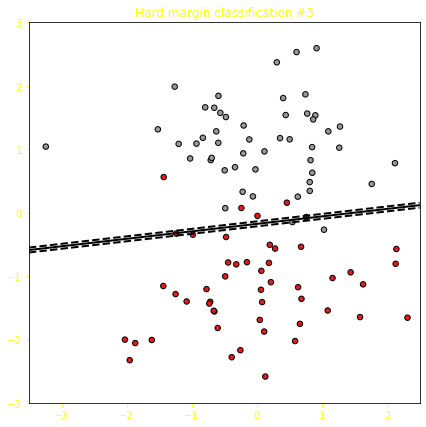

In [85]:
# plotting data & model boundary
fig, axes = plt.subplots(figsize=(7, 7), sharey=True)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=30, edgecolor='k', cmap='Set1') # our data
plot_svc_decision_boundary(clf3, -3.5, 2.5)                                         # our boundary

plt.axis([-3.5, 2.5, -3, 3])
plt.title("Hard margin classification #3")

plt.show()

The boundary margin is here very narrow, it is sensible to outliers. <br>
We have to apply soft margin classification in order to keep a more flexible model with a 'larger street' while limiting the margin violations.

In [87]:
# Scaling dataset for soft margin
X3b = X3_train.copy()
y3b = y3_train.copy()

scaler = StandardScaler()
clf3b = LinearSVC(C=1, loss="hinge", random_state=42)
clf3c = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_clf3b = Pipeline([
        ("scaler", scaler),
        ("linear_svc", clf3b),
    ])
scaled_clf3c = Pipeline([
        ("scaler", scaler),
        ("linear_svc", clf3c),
    ])

scaled_clf3b.fit(X3b, y3b)
scaled_clf3c.fit(X3b, y3b)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [11]:
# Convert to unscaled parameters
b1 = clf3b.decision_function([-scaler.mean_ / scaler.scale_])
b2 = clf3c.decision_function([-scaler.mean_ / scaler.scale_])
w1 = clf3b.coef_[0] / scaler.scale_
w2 = clf3c.coef_[0] / scaler.scale_
clf3b.intercept_ = np.array([b1])
clf3c.intercept_ = np.array([b2])
clf3b.coef_ = np.array([w1])
clf3c.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y3_train * 2 - 1
support_vectors_idx1 = (t * (X3_train.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X3_train.dot(w2) + b2) < 1).ravel()
clf3b.support_vectors_ = X3_train[support_vectors_idx1]
clf3c.support_vectors_ = X3_train[support_vectors_idx2]

In [12]:
model_evaluation(X3_test, y3_test, clf3b)

Prediction target:	 [0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1]
Test target:		 [0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1]
Accuracy:		 100.0 %


With standard scaling we are able to increase the accuracy score of the predictions.

Text(0.5, 0.98, 'Linear kernel with std-scaler')

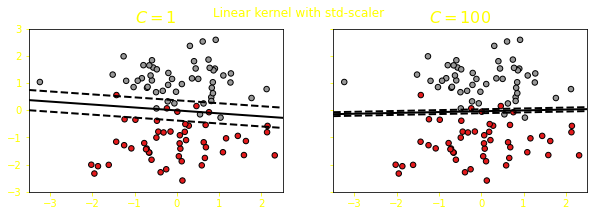

In [99]:
## Plots
fig, axes = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=30, edgecolor='k', cmap='Set1')
plot_svc_decision_boundary(clf3b, -3.5, 2.5)
plt.title("$C = {}$".format(clf3b.C), fontsize=16)
plt.axis([-3.5, 2.5, -3, 3])

plt.sca(axes[1])
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=30, edgecolor='k', cmap='Set1')
plot_svc_decision_boundary(clf3c, -3.5, 2.5)
plt.title("$C = {}$".format(clf3c.C), fontsize=16)
plt.axis([-3.5, 2.5, -3, 3])

fig.suptitle("Linear kernel with std-scaler")

With soft margin we allow SVM to make a certain number of mistakes. <br> 
This keeps the margin as wide as possible so that other points can still be classified correctly.

---
## Task 4

In [14]:
# getting data
X4, Y4 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, 
                             random_state=100)
                            
# splitting data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.4,random_state=34)

In [15]:
# generating model with linear kernel
clf4 = SVC(kernel="linear", C=float("inf"))
clf4.fit(X4_train, y4_train)
# evaluating model (linear)
model_evaluation(X4_test, y4_test, clf4)

Prediction target:	 [1 0 2 0 2 2 1 0 1 2 2 2 2 0 2 0 2 2 0 0 0 1 1 1 2 1 1 2 2 0 1 1 1 0 0 2 1
 0 0 1]
Test target:		 [1 0 2 0 2 2 1 0 1 2 2 2 2 0 2 0 2 2 0 0 0 1 1 1 2 1 1 2 2 0 1 1 1 0 0 2 1
 0 0 1]
Accuracy:		 100.0 %


In [16]:
# generating model with polynomial kernel
clf4b = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
        ])
clf4b.fit(X4_train, y4_train)

clf4b.fit(X4_train, y4_train) 
# evaluating model  (poly)
model_evaluation(X4_test, y4_test, clf4b)

Prediction target:	 [1 0 2 0 2 2 1 0 1 2 2 2 2 0 2 0 2 2 0 0 0 1 1 1 2 1 1 2 2 0 1 1 1 0 0 2 1
 0 0 1]
Test target:		 [1 0 2 0 2 2 1 0 1 2 2 2 2 0 2 0 2 2 0 0 0 1 1 1 2 1 1 2 2 0 1 1 1 0 0 2 1
 0 0 1]
Accuracy:		 100.0 %


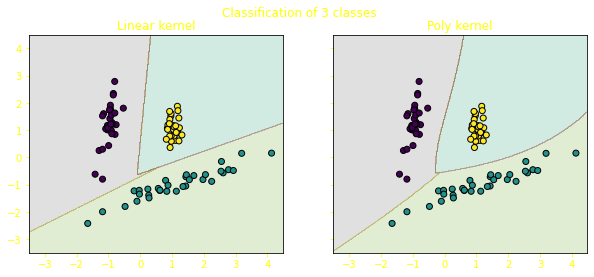

In [105]:
## Plots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))

# linear kernel plot
plot_boundaries(X4, Y4, clf4, (-3.5,4.5,0.02), axes[0])
plt.title("Linear kernel")
# poly kernel plot
plot_boundaries(X4, Y4, clf4b, (-3.5,4.5,0.02), axes[1])
plt.title("Poly kernel")

fig.suptitle("Classification of 3 classes")
plt.show()

The linear and polynomial kernell are both seeming to be good models for this dataset.

---
## Task 5

In [106]:
# getting data
X5, Y5 = make_blobs(n_features=2, centers=4, random_state=10)                      
# splitting data
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.3,random_state=35)

Poly kernel

In [107]:
clf5_poly = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=5))
        ])
clf5_poly.fit(X5_train, y5_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=4, kernel='poly'))])

RBF kernel

In [20]:
clf5_rbf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=15, C=25))
        ])
clf5_rbf.fit(X5_train, y5_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=25, gamma=15))])

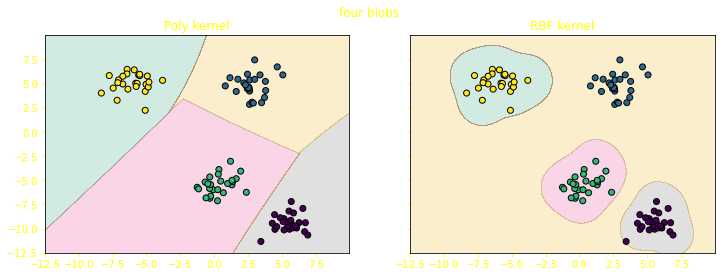

In [109]:
### Plots
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,4))

# poly kernel plot
plot_boundaries(X5, Y5, clf5_poly, (-12.5,10,0.02), ax[0])
plt.title("Poly kernel")

#rbf kernel plot
plot_boundaries(X5, Y5, clf5_rbf, (-12.5,10,0.02), ax[1])
plt.title("RBF kernel")

fig.suptitle("four blobs")
plt.show()

Observing the plot both have an accuracy of 100%.
The poly kernel seems to divide the clusters in  more identifiable pieces

---
## Task 6

In [110]:
# getting data
X6, Y6 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)            
Y6 = Y6 % 2        
# splitting data
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.3,random_state=35)

RBF kernel

In [112]:
clf6_rbf_overfit = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=200, C=7))
        ])
clf6_rbf_overfit.fit(X6_train, y6_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=7, gamma=200))])

In [111]:
clf6_rbf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=2, C=7))
        ])
clf6_rbf.fit(X6_train, y6_train)

model_evaluation(X6_test, y6_test, clf6_rbf)

Prediction target:	 [0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0]
Test target:		 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0]
Accuracy:		 96.66666666666667 %


We can tune the gamma & C to maximize the score.

The gamma of the rbf kernel can be thought as the 'spread'. <br>
How higher the gamma how smaller the decision boundary, this will overfit the target.

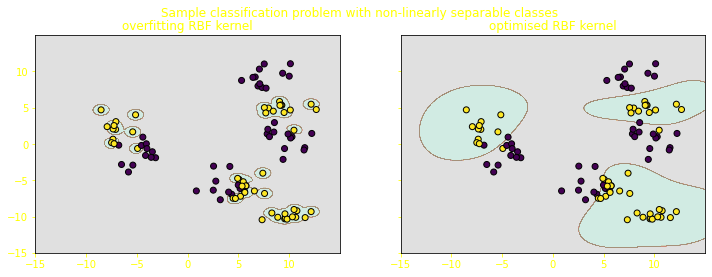

In [50]:
### Plots
fig, ax = plt.subplots(1,2,sharey=True, figsize=(12,4))

# overfitting rbf kernel
plot_boundaries(X6, Y6, clf6_rbf_overfit, range=(-15,15,0.02), ax=ax[0])
plt.title("overfitting RBF kernel")

# rbf kernel plot
plot_boundaries(X6, Y6, clf6_rbf, range=(-15,15,0.02), ax=ax[1])
plt.title("optimised RBF kernel")

fig.suptitle("Sample classification problem with non-linearly separable classes")
plt.show()

---